# Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.





In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv("data.csv")



## Data Preparation

In [3]:

#Eliminate " Unnamed: 32" & "id"
df= df.drop("Unnamed: 32",axis=1)
df= df.drop("id", axis=1)
df= df.replace({"M":1, "B":0})

#Drop not important features
drop_col = ["fractal_dimension_se", "smoothness_se", "fractal_dimension_mean", "texture_se", "symmetry_se"]

df=df.drop(drop_col, axis=1)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Model:
### Without downsampling

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [7]:
#Creating my predictive variable (X) and my target variable (Y)

#y = Target Variable
y = df.iloc[:,0]

#X= Predictors
X= df.iloc[:,1:26]
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



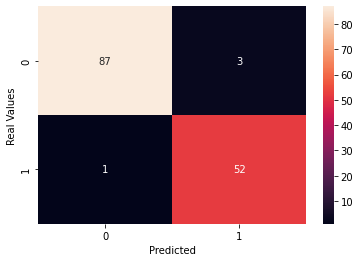

In [12]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Real Values'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Feature Importance

                    Feature  Importance
17          perimeter_worst    0.142929
7       concave points_mean    0.140063
18               area_worst    0.132663
22     concave points_worst    0.126172
15             radius_worst    0.098559
2            perimeter_mean    0.056644
6            concavity_mean    0.051891
0               radius_mean    0.035917
21          concavity_worst    0.027728
11                  area_se    0.021002
16            texture_worst    0.018406
9                 radius_se    0.017697
10             perimeter_se    0.016749
1              texture_mean    0.015370
19         smoothness_worst    0.014122
23           symmetry_worst    0.013443
20        compactness_worst    0.012605
5          compactness_mean    0.011324
12           compactness_se    0.008043
3                 area_mean    0.007410
8             symmetry_mean    0.006803
4           smoothness_mean    0.006740
14        concave points_se    0.006096
13             concavity_se    0.006085


c:\Users\Julian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


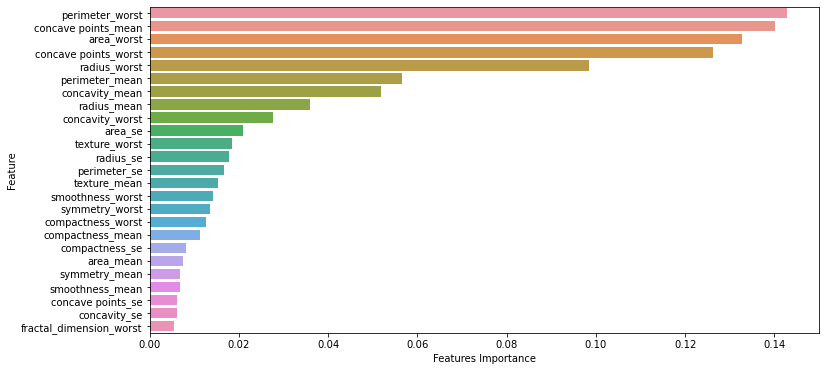

<Figure size 432x288 with 0 Axes>

In [31]:

# Replace these example values with your actual feature names
df1 = df.drop("diagnosis", axis=1)
feature_names = df1.columns.tolist()

# Create a Pandas DataFrame to store feature importances and their corresponding names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': clf.feature_importances_})

# Sort the DataFrame by importance values in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(feature_importances_df)

plt.figure(figsize=(12, 6))

sn.barplot(feature_importances_df['Importance'], feature_importances_df['Feature'])
plt.xlabel('Features Importance')
plt.show()
plt.tight_layout()  # To avoid overlapping labels
plt.show()
